In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Getting the data from data.csv file
data = pd.read_csv("data.csv", delimiter=',')
label = data["price"]
train = data.drop(["price","id","date","lat","long","zipcode"],axis=1)
m,n = train.shape
train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [3]:
label.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [4]:
#Adding a buffer into our training set to ease computation issue of the co-efficients
m,n = train.shape
train.insert(0,"buffer",[1]*m)
n+=1

In [5]:
#Cleaning the data
yr_ren = [1 if i!=0 else 0 for i in train.yr_renovated]
train.yr_renovated = yr_ren
train.head()

,buffer,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,1,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1,1690,7639
2,1,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,1,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,1,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


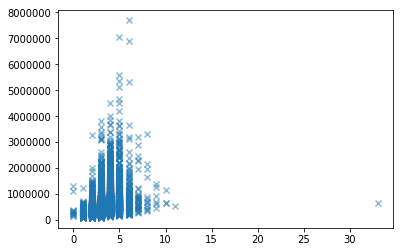

In [6]:
plt.scatter(train.bedrooms, label,marker='x',alpha=0.5)

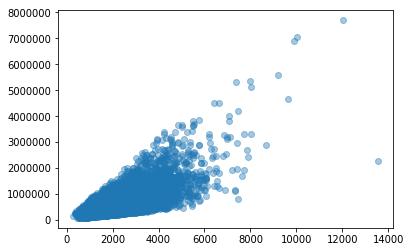

In [7]:
plt.scatter(train.sqft_living, label, marker='o', alpha=0.4)

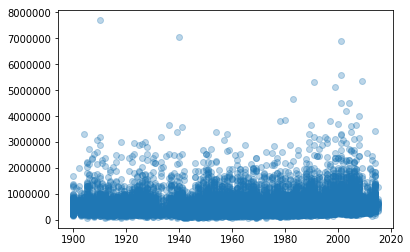

In [8]:
plt.scatter(train.yr_built, label, alpha=0.3)

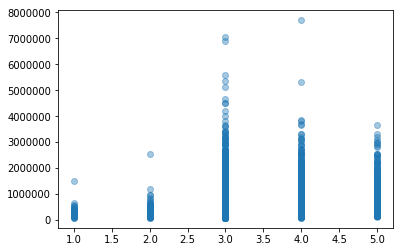

In [9]:
plt.scatter(train.condition, label, alpha=0.4)

In [10]:
#Normalizing the data
train = np.array(train)
label = np.array(label)
m = len(train)
n = len(train[0])
max_train = []
for i in range(n):
    max_train.append(train[:,i].max())
    train[:,i] = train[:,i]/train[:,i].max()
max_label = label.max()
print(max_train)
print(max_label)
label = (label/max_label).reshape((m,1))
print(train)
print(label)

[1.0, 33.0, 8.0, 13540.0, 1651359.0, 3.5, 1.0, 4.0, 5.0, 13.0, 9410.0, 4820.0, 2015.0, 1.0, 6210.0, 871200.0]
7700000.0
[[1.         0.09090909 0.125      ... 0.         0.215781   0.00648531]
 [1.         0.09090909 0.28125    ... 1.         0.27214171 0.00876837]
 [1.         0.06060606 0.125      ... 0.         0.43800322 0.0092539 ]
 ...
 [1.         0.12121212 0.3125     ... 0.         0.40289855 0.00562443]
 [1.         0.09090909 0.3125     ... 0.         0.28953301 0.00567264]
 [1.         0.12121212 0.3125     ... 0.         0.45732689 0.00641988]]
[[0.02881818]
 [0.06987013]
 [0.02337662]
 ...
 [0.0557013 ]
 [0.04284416]
 [0.13445325]]


In [15]:
#Splitting the data into traing and test set
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(train , label , test_size = 0.30,random_state =2)

In [16]:
#Function to find the cost of the hypothesis
def cost(X, y, theta):
    return ((1/len(X))*((X.dot(theta)-y)**2).sum())*max_label

In [18]:
#Getting the coefficients to predict the price
theta = np.random.random((n,1))
alpha = 0.15
num_iters = 50000
m = len(x_train)
temp = np.zeros((n,1))
cst = []
for i in range(num_iters):
    for j in range(n):
        temp[j,0] = theta[j,0] - (alpha/m)*(((x_train.dot(theta)-y_train)*(x_train[:,j].reshape((m,1)))).sum())
    if i%500==0 and i!=0:
        cst.append(cost(x_train, y_train, theta))
    theta = temp

Text(0, 0.5, 'Cost of hypothesis')

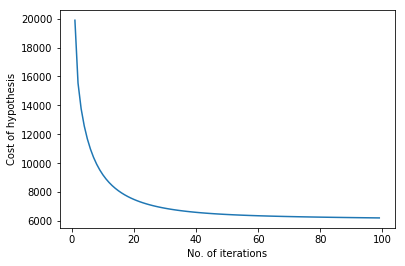

In [19]:
#Displaying the work of gradient descent
plt.plot(range(1,len(cst)+1),cst)
plt.xlabel("No. of iterations")
plt.ylabel("Cost of hypothesis")

In [20]:
#Average error in prediction
print(cost(x_test, y_test, theta))

6305.950101121189
